In [7]:
#https://www.kaggle.com/sudhirnl7/linear-regression-tutorial
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [3]:
#Import Dataset
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Charge vs BMI ')

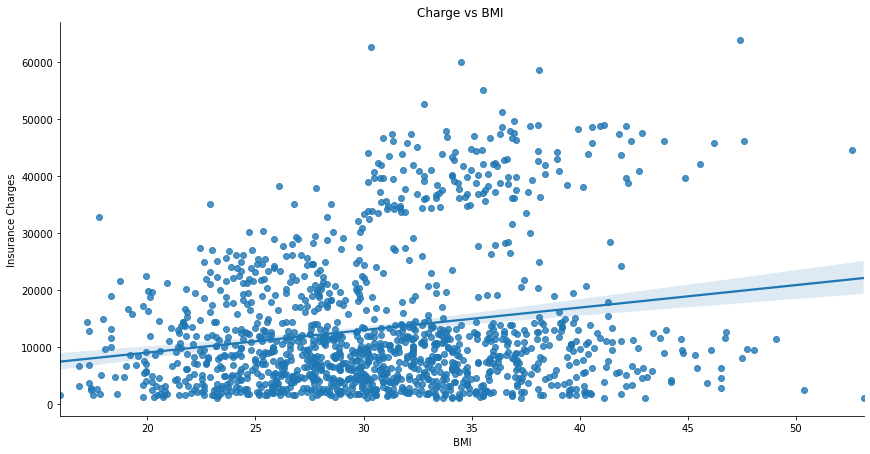

In [9]:
# Y - dependent variable is charges which should be predicted
# draw line plot using seaborn to find relationship between bmi and charges
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel(' BMI ')
plt.ylabel(' Insurance Charges ')
plt.title('Charge vs BMI ')

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#check for missing value
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
df.isnull().values.any()

False

Text(0.5, 1.0, 'Missing value in dataaset')

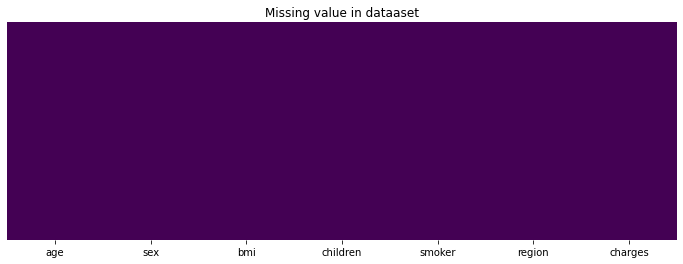

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in dataaset')

<AxesSubplot:>

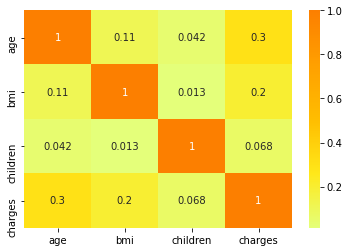

In [14]:
#correlation plot
corr = df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


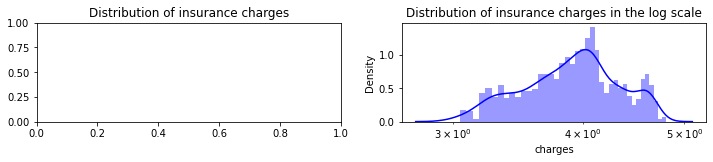

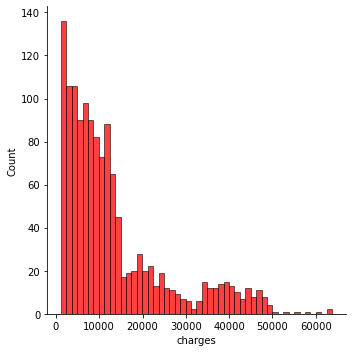

In [19]:
f = plt.figure(figsize=(12,4))
ax=f.add_subplot(221)
sns.displot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(222)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in the log scale')
ax.set_xscale('log')

In [10]:
X = df[['age', 'bmi']]
y = df['charges']
#calculate VIF to detect Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
print(vif_data)

  feature       VIF
0     age  7.457006
1     bmi  7.457006


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

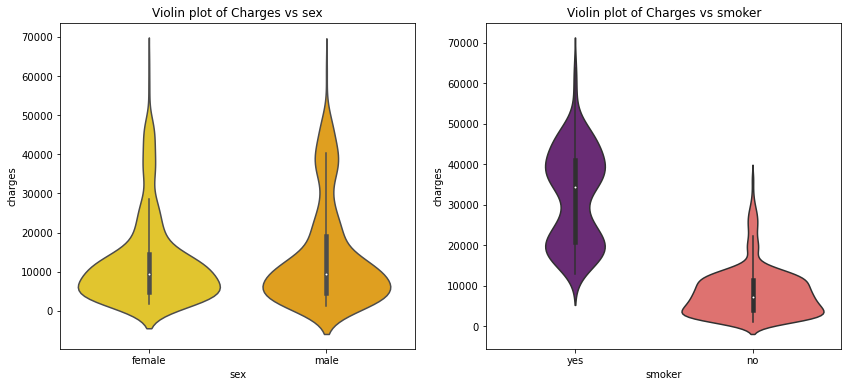

In [22]:
#categorical variable vs continuous variable  
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=df,palette='Wistia', ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette = 'magma', ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5, 1.0, 'Box plot of charges vs children')

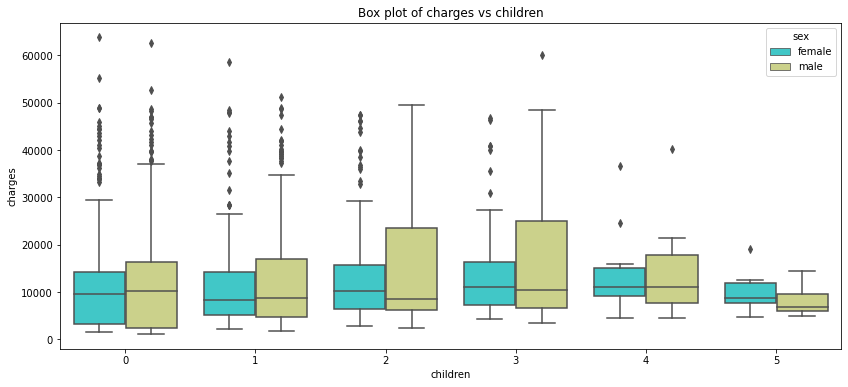

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue = 'sex', data=df,palette = 'rainbow')
plt.title('Box plot of charges vs children')

In [26]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs region')

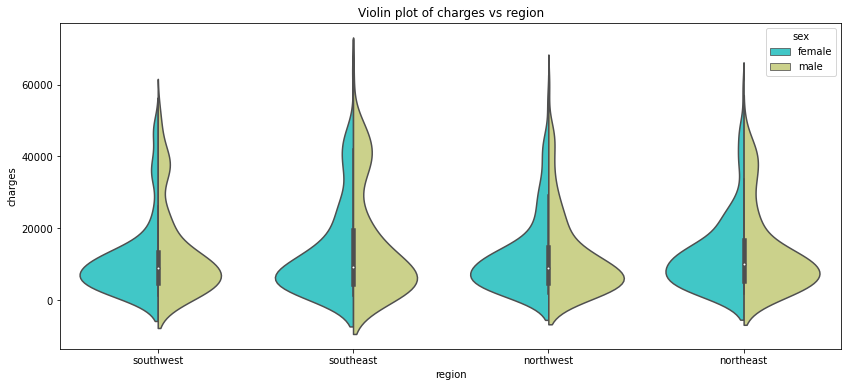

In [27]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue='sex',data=df,palette='rainbow',split = True)
plt.title('Violin plot of charges vs region')

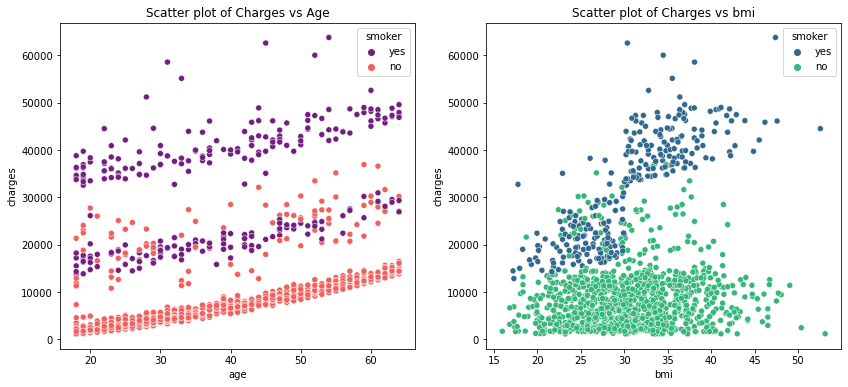

In [33]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title("Scatter plot of Charges vs Age")

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title("Scatter plot of Charges vs bmi")
plt.savefig('sc.png')

In [34]:
#Data Preprocessing
#Dummy variable
categorical_columns = ['sex','children','smoker','region']
df_encode = pd.get_dummies(data=df,prefix='OHE',prefix_sep = '_',
                          columns = categorical_columns,
                          drop_first = True,
                          dtype = 'int8')

In [35]:
#verify the dummy variable process
print('Columns in original data frame',df.columns.values)
print('\nNumber of rows and columns in the dataset: ',df.shape)
print('\ncolumns in dataset after encoding dummy variable : \n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset :',df_encode.shape)

Columns in original data frame ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset:  (1338, 7)

columns in dataset after encoding dummy variable : 
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset : (1338, 13)


In [45]:
#since dependent variable is skewed, apply log transformation
df_encode['charges'] = np.log(df_encode['charges'])

In [46]:
# X & Y
X = df_encode.drop('charges', axis = 1)
Y = df_encode['charges']

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=23)

In [48]:
#Model building - Scikit learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [49]:
#Evaluation
#sklearn regression module
y_pred = lin_reg.predict(X_test)
#Evaluation - MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred,Y_test)

#R_Square
R_Square_sk = lin_reg.score(X_test,Y_test)
print('Mean squared error :',J_mse_sk)
print('R square error :',R_Square_sk)

Mean squared error : 0.1872962232298189
R square error : 0.7795687545055319


In [50]:
#check for Multicollinearity
VIF = 1/(1-R_Square_sk)

In [51]:
VIF  # >1 and <5 so moderate multicollinearity

4.536561945911138